In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
# Load each dataset 
df1 = pd.read_excel(r"C:\Users\PC\Documents\UR NOTES\DATASET\Data\Gacuriro.xlsx")
df2 = pd.read_excel(r"C:\Users\PC\Documents\UR NOTES\DATASET\Data\Gikondo-Mburabuturo.xlsx")
df3 = pd.read_excel(r"C:\Users\PC\Documents\UR NOTES\DATASET\Data\Mont Kigali.xlsx")
df4 = pd.read_excel(r"C:\Users\PC\Documents\UR NOTES\DATASET\Data\Rusororo.xlsx")


In [82]:
# Add station names
df1['station'] = 'Gacuriro'
df2['station'] = 'Gikondo-Mburabuturo'
df3['station'] = 'Mont Kigali'
df4['station'] = 'Rusororo'

In [83]:
# Combine all into one DataFrame
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [84]:
print(df.head(10))

             DateTime      PM2.5       PM10   station
0 2021-05-25 21:00:00  76.628333  81.789688  Gacuriro
1 2021-05-25 22:00:00  77.476182  82.940000  Gacuriro
2 2021-05-25 23:00:00  65.648952  74.585667  Gacuriro
3 2021-05-26 00:00:00  58.587130  70.225291  Gacuriro
4 2021-05-26 01:00:00  61.995580  72.265000  Gacuriro
5 2021-05-26 02:00:00  52.489462  65.469955  Gacuriro
6 2021-05-26 03:00:00  51.757289  64.622667  Gacuriro
7 2021-05-26 04:00:00  51.886828  64.610793  Gacuriro
8 2021-05-26 05:00:00  49.801892  61.922568  Gacuriro
9 2021-05-26 06:00:00  51.122055  62.755205  Gacuriro


In [85]:
# Convert datetime column to proper datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [86]:
print(df.head(10))

             DateTime      PM2.5       PM10   station
0 2021-05-25 21:00:00  76.628333  81.789688  Gacuriro
1 2021-05-25 22:00:00  77.476182  82.940000  Gacuriro
2 2021-05-25 23:00:00  65.648952  74.585667  Gacuriro
3 2021-05-26 00:00:00  58.587130  70.225291  Gacuriro
4 2021-05-26 01:00:00  61.995580  72.265000  Gacuriro
5 2021-05-26 02:00:00  52.489462  65.469955  Gacuriro
6 2021-05-26 03:00:00  51.757289  64.622667  Gacuriro
7 2021-05-26 04:00:00  51.886828  64.610793  Gacuriro
8 2021-05-26 05:00:00  49.801892  61.922568  Gacuriro
9 2021-05-26 06:00:00  51.122055  62.755205  Gacuriro


In [87]:
#STEP 2: Extract Useful Time Components
df['hour'] = df['DateTime'].dt.hour
df['day'] = df['DateTime'].dt.day
df['month'] = df['DateTime'].dt.month
df['year'] = df['DateTime'].dt.year
df['dayofweek'] = df['DateTime'].dt.day_name()



In [88]:
#STEP 3: Basic Data Overview
print(df.head())
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

             DateTime      PM2.5       PM10   station  hour  day  month  year  \
0 2021-05-25 21:00:00  76.628333  81.789688  Gacuriro    21   25      5  2021   
1 2021-05-25 22:00:00  77.476182  82.940000  Gacuriro    22   25      5  2021   
2 2021-05-25 23:00:00  65.648952  74.585667  Gacuriro    23   25      5  2021   
3 2021-05-26 00:00:00  58.587130  70.225291  Gacuriro     0   26      5  2021   
4 2021-05-26 01:00:00  61.995580  72.265000  Gacuriro     1   26      5  2021   

   dayofweek  
0    Tuesday  
1    Tuesday  
2    Tuesday  
3  Wednesday  
4  Wednesday  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128585 entries, 0 to 128584
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   DateTime   128585 non-null  datetime64[ns]
 1   PM2.5      128585 non-null  float64       
 2   PM10       128585 non-null  float64       
 3   station    128585 non-null  object        
 4   hour       128585 no

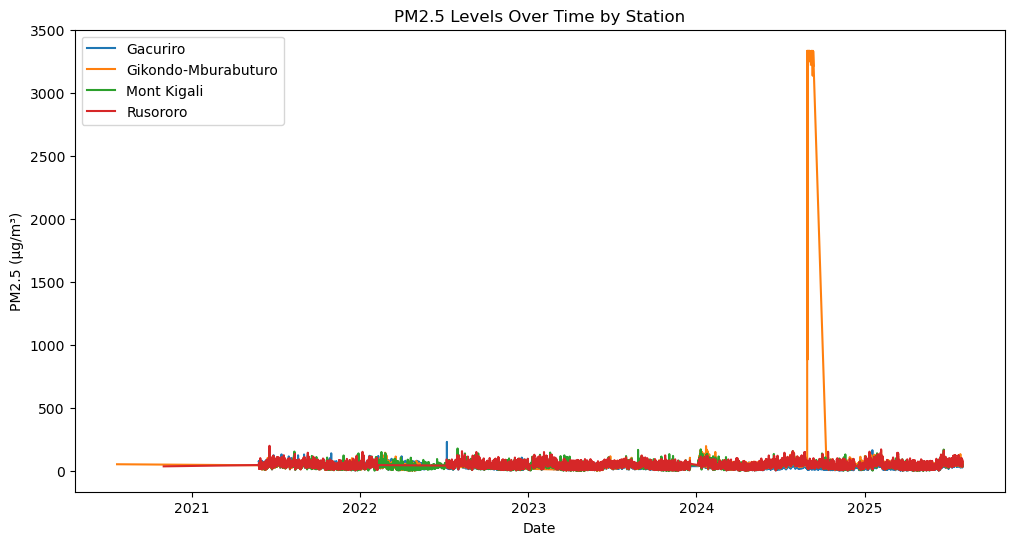

In [89]:
#STEP 4: Visualize Temporal Trends
#(a) PM2.5 Over Time per Station
plt.figure(figsize=(12,6))
for station in df['station'].unique():
    subset = df[df['station'] == station]
    plt.plot(subset['DateTime'], subset['PM2.5'], label=station)
plt.legend()
plt.title('PM2.5 Levels Over Time by Station')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

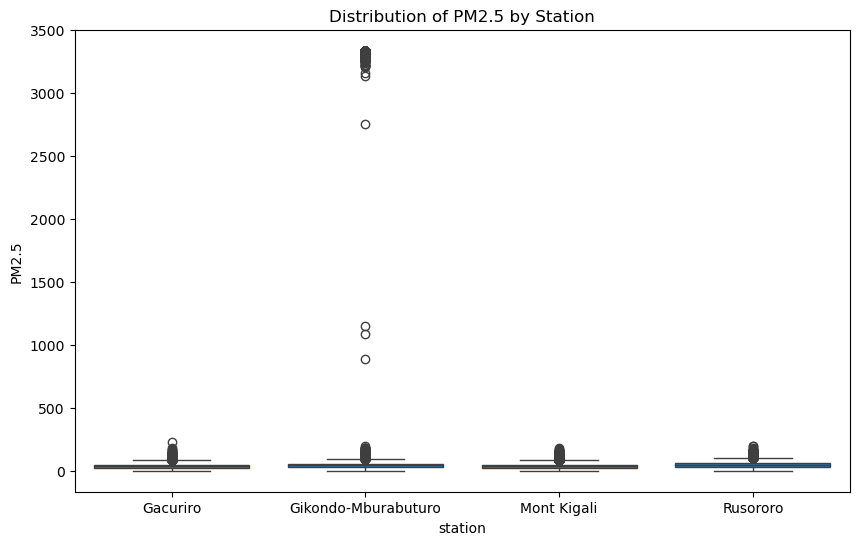

In [90]:
#(b) Distribution Comparison Across Stations
plt.figure(figsize=(10,6))
sns.boxplot(x='station', y='PM2.5', data=df)
plt.title('Distribution of PM2.5 by Station')
plt.show()

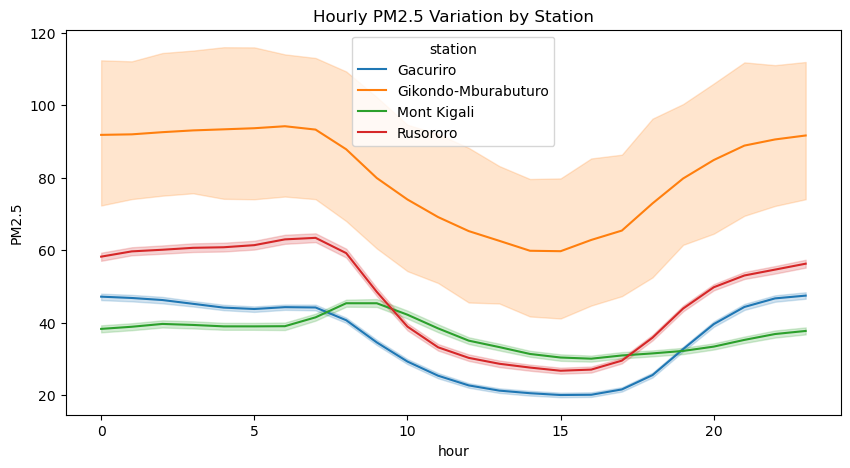

In [91]:
#(c) Time-of-Day Pattern
plt.figure(figsize=(10,5))
sns.lineplot(x='hour', y='PM2.5', hue='station', data=df)
plt.title('Hourly PM2.5 Variation by Station')
plt.show()

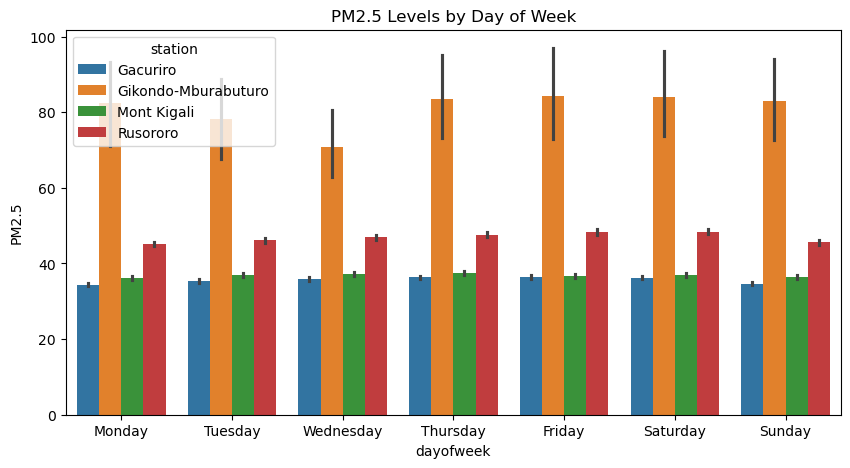

In [92]:
#(d) Day-of-Week Pattern
plt.figure(figsize=(10,5))
sns.barplot(x='dayofweek', y='PM2.5', hue='station', data=df,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('PM2.5 Levels by Day of Week')
plt.show()

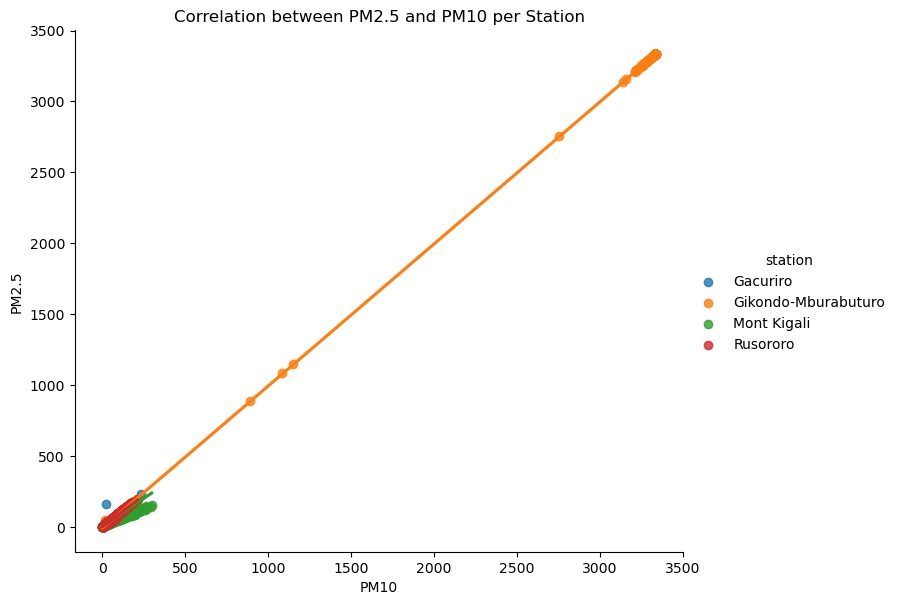

          PM2.5      PM10
PM2.5  1.000000  0.999432
PM10   0.999432  1.000000


In [93]:
#(e) Correlation between PM2.5 and PM10
sns.lmplot(x='PM10', y='PM2.5', hue='station', data=df, height=6, aspect=1.2)
plt.title('Correlation between PM2.5 and PM10 per Station')
plt.show()

print(df[['PM2.5', 'PM10']].corr())

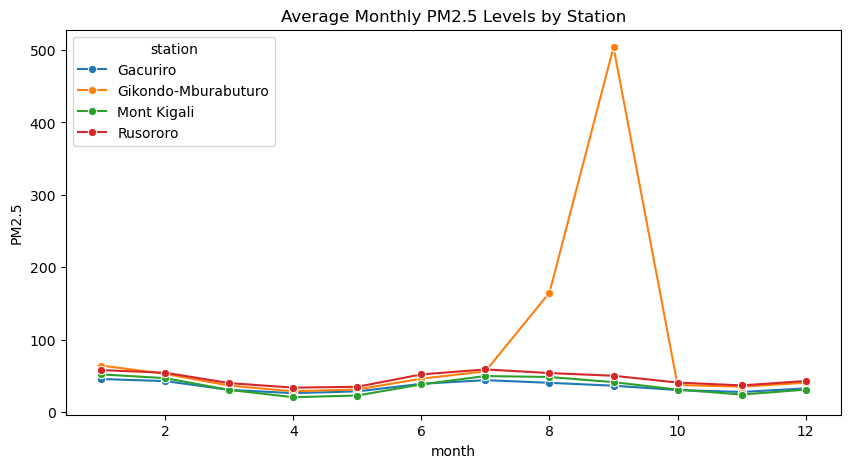

In [94]:
#STEP 5: Monthly and Seasonal Trend
monthly = df.groupby(['station', 'month'])[['PM2.5', 'PM10']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='PM2.5', hue='station', data=monthly, marker='o')
plt.title('Average Monthly PM2.5 Levels by Station')
plt.show()

In [95]:
#Extract week and month
df['week'] = df['DateTime'].dt.isocalendar().week
df['month'] = df['DateTime'].dt.month

In [96]:
# Weekly averages
weekly_avg = df.groupby('week')[['PM2.5', 'PM10']].mean().reset_index()

# Monthly averages
monthly_avg = df.groupby('month')[['PM2.5', 'PM10']].mean().reset_index()


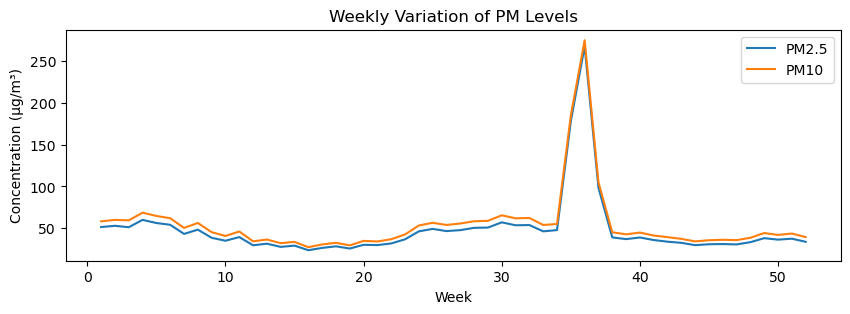

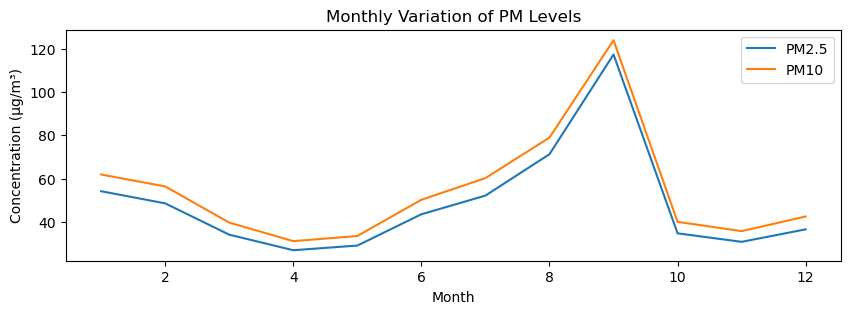

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(weekly_avg['week'], weekly_avg['PM2.5'], label='PM2.5')
plt.plot(weekly_avg['week'], weekly_avg['PM10'], label='PM10')
plt.title('Weekly Variation of PM Levels')
plt.xlabel('Week')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.plot(monthly_avg['month'], monthly_avg['PM2.5'], label='PM2.5')
plt.plot(monthly_avg['month'], monthly_avg['PM10'], label='PM10')
plt.title('Monthly Variation of PM Levels')
plt.xlabel('Month')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()


# Prepare Data for Modeling

In [98]:
print(df.columns)


Index(['DateTime', 'PM2.5', 'PM10', 'station', 'hour', 'day', 'month', 'year',
       'dayofweek', 'week'],
      dtype='object')


In [99]:
print(df.head(5))

             DateTime      PM2.5       PM10   station  hour  day  month  year  \
0 2021-05-25 21:00:00  76.628333  81.789688  Gacuriro    21   25      5  2021   
1 2021-05-25 22:00:00  77.476182  82.940000  Gacuriro    22   25      5  2021   
2 2021-05-25 23:00:00  65.648952  74.585667  Gacuriro    23   25      5  2021   
3 2021-05-26 00:00:00  58.587130  70.225291  Gacuriro     0   26      5  2021   
4 2021-05-26 01:00:00  61.995580  72.265000  Gacuriro     1   26      5  2021   

   dayofweek  week  
0    Tuesday    21  
1    Tuesday    21  
2    Tuesday    21  
3  Wednesday    21  
4  Wednesday    21  


In [100]:
print(df.columns)

Index(['DateTime', 'PM2.5', 'PM10', 'station', 'hour', 'day', 'month', 'year',
       'dayofweek', 'week'],
      dtype='object')


In [101]:
print(type(df.index))


<class 'pandas.core.indexes.range.RangeIndex'>


In [102]:
# Convert DateTime column to datetime (safe even if already converted)
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Sort by time (VERY IMPORTANT)
df = df.sort_values('DateTime')

# Set DateTime as index
df = df.set_index('DateTime')


In [103]:
print(type(df.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [104]:
print(df.columns)


Index(['PM2.5', 'PM10', 'station', 'hour', 'day', 'month', 'year', 'dayofweek',
       'week'],
      dtype='object')


In [105]:
print(type(df.index))
print(df.index.is_monotonic_increasing)


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
True


In [106]:
#Create target for 6-hour ahead
HORIZON = 6  # hours ahead

df['PM2.5_target_6h'] = df['PM2.5'].shift(-HORIZON)


# Create Lag Features for PM2.5

In [107]:
#Create lag features
lags = [1, 2, 3, 6, 12]

for lag in lags:
    df[f'PM2.5_lag_{lag}'] = df['PM2.5'].shift(lag)


In [108]:
import numpy as np


In [109]:
#Time features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek


In [110]:
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)


In [111]:
#Drop missing rows
df_model = df.dropna().copy()


In [112]:
# Select Features and Target
features = [
    'PM2.5_lag_1',
    'PM2.5_lag_2',
    'PM2.5_lag_3',
    'PM2.5_lag_6',
    'PM2.5_lag_12',
    'hour_sin',
    'hour_cos',
    'dayofweek'
]

X = df_model[features]
y = df_model['PM2.5_target_6h']


In [113]:
#Train-test split
split_index = int(len(df_model) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


In [114]:
#Train Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=300,
                      n_jobs=-1, random_state=42)

In [115]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.3f}")


RMSE: 17.38
MAE : 11.88
R²  : 0.416


In [116]:
pip install pandas numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


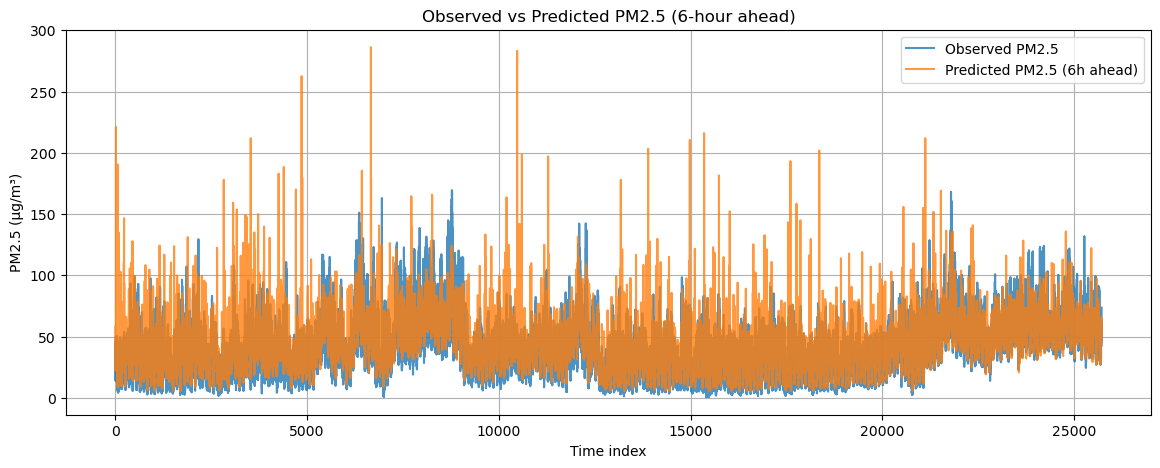

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label="Observed PM2.5", alpha=0.8)
plt.plot(y_pred, label="Predicted PM2.5 (6h ahead)", alpha=0.8)

plt.title("Observed vs Predicted PM2.5 (6-hour ahead)")
plt.xlabel("Time index")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)

plt.show()


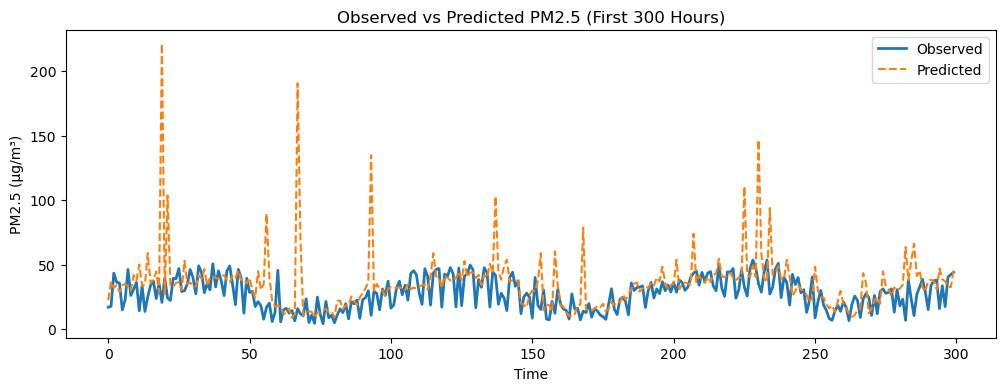

In [118]:
#Plot predictions vs observations
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(y_test.values[:300], label="Observed", linewidth=2)
plt.plot(y_pred[:300], label="Predicted", linestyle="--")
plt.legend()
plt.title("Observed vs Predicted PM2.5 (First 300 Hours)")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("Time")
plt.show()


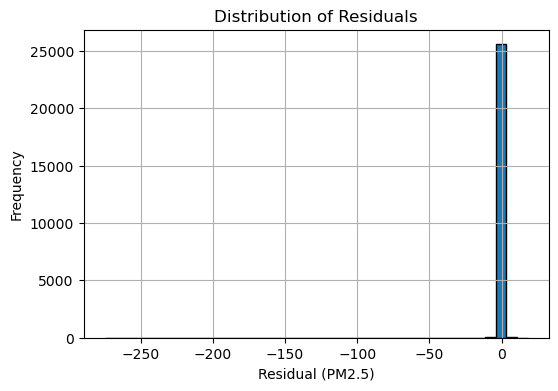

In [119]:
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=40, edgecolor='black')

plt.title("Distribution of Residuals")
plt.xlabel("Residual (PM2.5)")
plt.ylabel("Frequency")

plt.grid(True)
plt.show()


In [120]:
import pandas as pd

feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importance


,feature,importance
0,PM2.5_lag_1,0.275474
1,PM2.5_lag_2,0.231925
2,PM2.5_lag_3,0.144269
3,PM2.5_lag_6,0.131567
4,PM2.5_lag_12,0.106751
6,hour_cos,0.042287
5,hour_sin,0.037647
7,dayofweek,0.030080


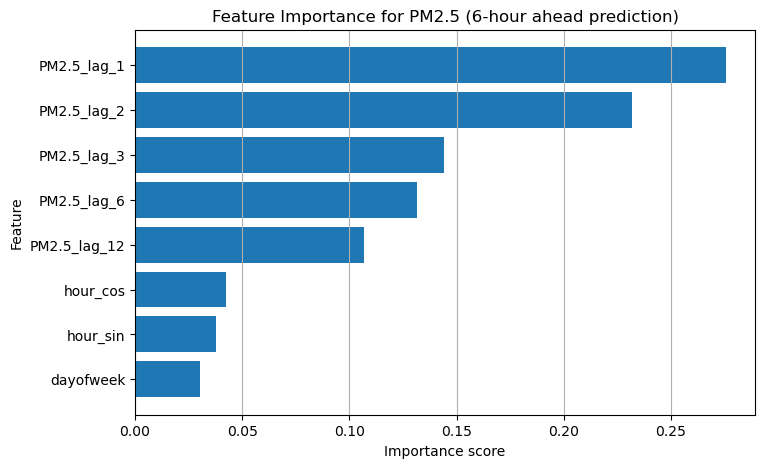

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
    feature_importance["feature"],
    feature_importance["importance"]
)
plt.gca().invert_yaxis()

plt.title("Feature Importance for PM2.5 (6-hour ahead prediction)")
plt.xlabel("Importance score")
plt.ylabel("Feature")
plt.grid(axis="x")

plt.show()


In [123]:
import numpy as np
import pandas as pd

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [125]:
df_model = df_model.copy()

df_model["PM25_target_6h"] = df_model["PM2.5"].shift(-6)


In [126]:
df_model["pm25_lag_1"]  = df_model["PM2.5"].shift(1)
df_model["pm25_lag_3"]  = df_model["PM2.5"].shift(3)
df_model["pm25_lag_6"]  = df_model["PM2.5"].shift(6)
df_model["pm25_lag_12"] = df_model["PM2.5"].shift(12)

df_model["pm25_roll_6"]  = df_model["PM2.5"].shift(1).rolling(6).mean()
df_model["pm25_roll_12"] = df_model["PM2.5"].shift(1).rolling(12).mean()
df_model["pm25_roll_24"] = df_model["PM2.5"].shift(1).rolling(24).mean()


In [127]:
df_model["hour"] = df_model.index.hour
df_model["dayofweek"] = df_model.index.dayofweek
df_model["month"] = df_model.index.month

df_model["hour_sin"] = np.sin(2 * np.pi * df_model["hour"] / 24)
df_model["hour_cos"] = np.cos(2 * np.pi * df_model["hour"] / 24)


In [128]:
features = [
    "pm25_lag_1",
    "pm25_lag_3",
    "pm25_lag_6",
    "pm25_lag_12",
    "pm25_roll_6",
    "pm25_roll_12",
    "pm25_roll_24",
    "hour_sin",
    "hour_cos",
    "dayofweek",
    "month"
]

X = df_model[features]
y = df_model["PM25_target_6h"]


In [129]:
data = pd.concat([X, y], axis=1).dropna()

X = data[features]
y = data["PM25_target_6h"]


In [130]:
split = int(len(data) * 0.8)

X_train = X.iloc[:split]
X_test  = X.iloc[split:]

y_train = y.iloc[:split]
y_test  = y.iloc[split:]


In [131]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=-1, num_parallel_tree=None, ...)

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"XGBoost 6h → RMSE: {rmse:.2f}")
print(f"XGBoost 6h → MAE : {mae:.2f}")
print(f"XGBoost 6h → R²  : {r2:.3f}")


XGBoost 6h → RMSE: 14.35
XGBoost 6h → MAE : 10.23
XGBoost 6h → R²  : 0.602


In [133]:
feature_importance = pd.DataFrame({
    "feature": features,
    "importance": xgb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importance


,feature,importance
5,pm25_roll_12,0.292017
4,pm25_roll_6,0.085025
3,pm25_lag_12,0.081072
2,pm25_lag_6,0.079755
1,pm25_lag_3,0.077728
0,pm25_lag_1,0.077565
8,hour_cos,0.071188
7,hour_sin,0.070531
9,dayofweek,0.066903
6,pm25_roll_24,0.050053


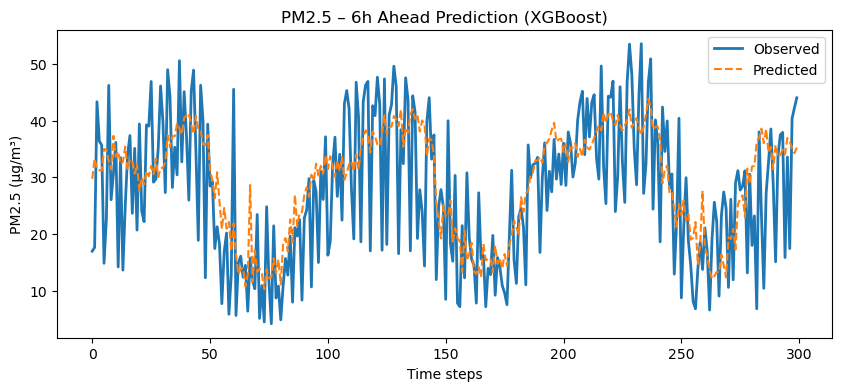

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(y_test.values[:300], label="Observed", linewidth=2)
plt.plot(y_pred[:300], label="Predicted", linestyle="--")
plt.title("PM2.5 – 6h Ahead Prediction (XGBoost)")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("Time steps")
plt.legend()
plt.show()


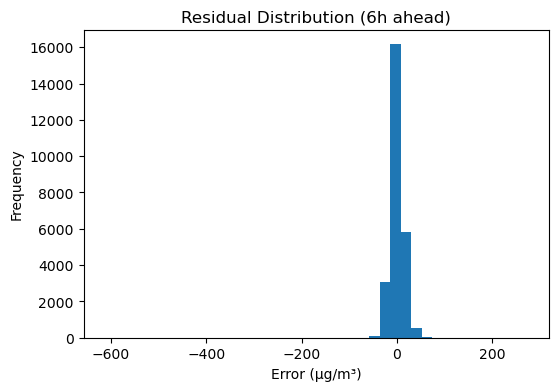

In [135]:
residuals = y_test.values - y_pred

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=40)
plt.title("Residual Distribution (6h ahead)")
plt.xlabel("Error (µg/m³)")
plt.ylabel("Frequency")
plt.show()
